<a href="https://colab.research.google.com/github/hemhemoh/MNIST-NUMBER-IDENTIFICATION-USING-KERAS/blob/main/Number_Identification_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import numpy
import tensorflow_datasets as tfds
import pandas as pd
%matplotlib inline


In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
from tensorflow.keras.datasets import mnist
data = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = data
X_train.shape


(60000, 28, 28)

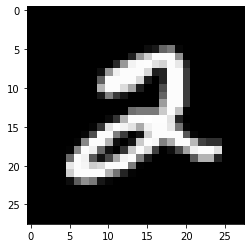

In [ ]:
sample = 5
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
                
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation= "softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.4170 - accuracy: 0.8825
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1988 - accuracy: 0.9422
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1550 - accuracy: 0.9539
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1290 - accuracy: 0.9621
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1124 - accuracy: 0.9668
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9698
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9738
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9758
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9777
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9794

In [ ]:
scores = model.evaluate(X_test, y_test)
print(scores[1] * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9663
96.63000106811523
